<a id="goal"></a>
## Project Description and Goal

<font color="blue">

We're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. 
We'll study a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.
The task is to find patterns in the available information. We want to understand passenger preferences and the impact of external factors on rides.   

## Step 1. Data preprocessing

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
company_trips.head(5)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
location_trips.head(5)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [4]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
location_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
company_trips.duplicated().sum()

0

In [7]:
location_trips.duplicated().sum()

0

<font color="blue"> Data1 has 2 columns and 64 rows. Data2 has 2 columns and 94 rows. There are no missing values, no duplicates and the data types are correct.

<a id="exp"></a>
## Step 2. Exploratory data analysis 

<font color="blue">In the next step we would identify the top neighborhoods in terms of drop-offs
So we keep the first 30 companies and unite the companies with small amounts of rides under the category "other".    

In [8]:
big_trips=company_trips.sort_values('trips_amount', ascending=False).head(30)

In [9]:
company_trips['company_grouped_name']=company_trips['company_name'].where(company_trips['company_name'].isin(big_trips['company_name']),'Others')

In [10]:
company_trips.head()

,company_name,trips_amount,company_grouped_name
0,Flash Cab,19558,Flash Cab
1,Taxi Affiliation Services,11422,Taxi Affiliation Services
2,Medallion Leasing,10367,Medallion Leasing
3,Yellow Cab,9888,Yellow Cab
4,Taxi Affiliation Service Yellow,9299,Taxi Affiliation Service Yellow


In [11]:
company_trips.query('company_grouped_name=="others"')

,company_name,trips_amount,company_grouped_name


In [11]:
company_trips.pivot_table(index='company_grouped_name', values='trips_amount' , aggfunc='sum').head()

,trips_amount
company_grouped_name,
24 Seven Taxi,1775
303 Taxi,250
5 Star Taxi,310
American United,1404
Blue Diamond,2070


In [13]:
df=company_trips.pivot_table(index='company_grouped_name', values='trips_amount' , aggfunc='sum').sort_values('trips_amount').reset_index()

In [14]:
df

,company_grouped_name,trips_amount
0,303 Taxi,250
1,5 Star Taxi,310
2,Service Taxi Association,402
3,Gold Coast Taxi,428
4,Top Cab Affiliation,978
5,Chicago Taxicab,1014
6,KOAM Taxi Association,1259
7,Chicago Independents,1296
8,American United,1404
9,Others,1426


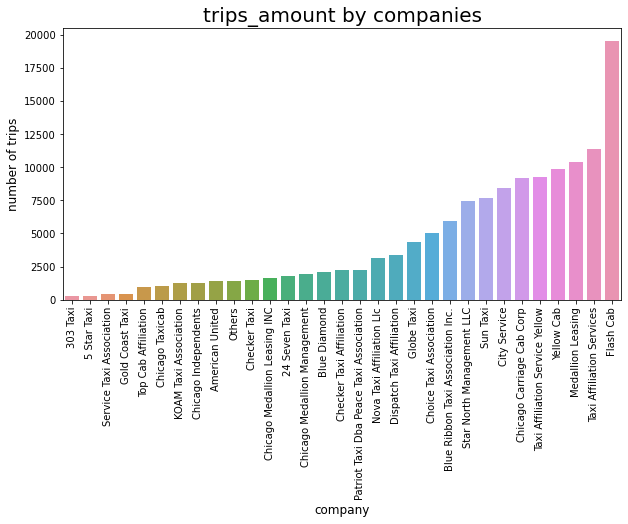

In [19]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.barplot(x='company_grouped_name', y='trips_amount', data=df)

ax.set_title('trips_amount by companies' , fontsize=20)
ax.set_xlabel('company',fontsize=12)
ax.set_ylabel('number of trips',fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

<font color="blue">This chart shows the number of rides for each taxi company on November 15-16, 2017. We see that FlashCab has the highest number of trips(about 20000 trips on November 15-16, 2017) and is the most popular taxi company. The 10 most popular are:
   - Flash Cab -------------------------- 19558
   - Taxi Affiliation Services ---------- 11422
   - Medallion Leasing ------------------ 10367
   - Yellow Cab ------------------------- 9888
   - Taxi Affiliation Service Yellow ---- 9299
   - Chicago Carriage Cab Corp ---------- 9181
   - City Service ----------------------- 8448
   - Sun Taxi --------------------------- 7701
   - Star North Management LLC ---------- 7455
   - Blue Ribbon Taxi Association Inc --- 5953
    
    The number of trips for Flash Cab company is two or more times more than other companies. 

In [20]:
df=location_trips.sort_values('average_trips', ascending=False).head(10)

In [21]:
df

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


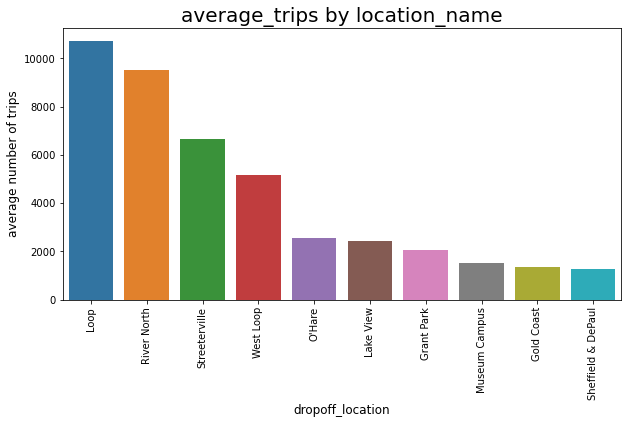

In [23]:
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.barplot(x='dropoff_location_name', y='average_trips', data=df)

ax.set_title('average_trips by location_name' , fontsize=20)
ax.set_xlabel('dropoff_location',fontsize=12)
ax.set_ylabel('average number of trips',fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

<font color="blue">This chart shows the average number of rides that ended in each Chicago neighborhoods in November 2017. We can see that The 10 most traffic areas in Chicago on November 2017 are:
   - Loop ---------------- 10727.466667
   - River North --------- 9523.666667
   - Streeterville-------- 6664.666667
   - West Loop ----------- 5163.666667
   - O'Hare -------------- 2546.900000
   - Lake View ----------- 2420.966667
   - Grant Park ---------- 2068.533333
   - Museum Campus ------- 1510.000000
   - Gold Coast ---------- 1364.233333
   - Sheffield & DePaul --- 1259.766667 
    
  Loop and River North are twice or more than other traffic areas. The difference between the first 4 regions and other regions is very large.

## Conclusion

<font color="blue"> FlashCab has the highest number of trips(about 20000 trips on November 15-16, 2017) and is the most popular taxi company. The 10 most popular are:
   - Flash Cab -------------------------- 19558
   - Taxi Affiliation Services ---------- 11422
   - Medallion Leasing ------------------ 10367
   - Yellow Cab ------------------------- 9888
   - Taxi Affiliation Service Yellow ---- 9299
   - Chicago Carriage Cab Corp ---------- 9181
   - City Service ----------------------- 8448
   - Sun Taxi --------------------------- 7701
   - Star North Management LLC ---------- 7455
   - Blue Ribbon Taxi Association Inc --- 5953
    
The number of trips for Flash Cab company is two or more times more than other companies.
    
    
The 10 most traffic areas in Chicago on November 2017 are:
   - Loop ---------------- 10727.466667
   - River North --------- 9523.666667
   - Streeterville-------- 6664.666667
   - West Loop ----------- 5163.666667
   - O'Hare -------------- 2546.900000
   - Lake View ----------- 2420.966667
   - Grant Park ---------- 2068.533333
   - Museum Campus ------- 1510.000000
   - Gold Coast ---------- 1364.233333
   - Sheffield & DePaul --- 1259.766667 
    
Loop and River North are twice or more than other traffic areas. The difference between the first 4 regions and other regions is very large.    

<a id="hyp"></a>
## Step 3. Testing hypotheses 

In [24]:
weather_trips=pd.read_csv('https://code.s3.yandex.net/datasets/project_sql_result_07.csv')
weather_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [25]:
weather_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [26]:
weather_trips.duplicated().sum()

197

In [27]:
weather_trips.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [28]:
weather_trips['start_ts']=pd.to_datetime(weather_trips['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [29]:
weather_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [30]:
weather_trips.drop_duplicates(inplace=True)

<font color="blue"> Data has 3 columns and 1068 rows. There are no missing values, 197 duplicates that we droped them and we changed the data type of 'start_ts' column into datatime. 

In [31]:
sample1=weather_trips.query('weather_conditions=="Bad"')

In [32]:
sample2=weather_trips.query('weather_conditions=="Good"')

<font color="blue">In the next step we are going to test the hypothesis:
    
**The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.**

  - H0: Average duration of rides in both good and worst weather are the same.<br>
  - H1: Average duration of rides for both good and worst are different.

In [33]:
np.var(sample1.duration_seconds)

561003.0958729

In [34]:
np.var(sample2.duration_seconds)

597389.5417434272

In [35]:
p=st.ttest_ind(sample1['duration_seconds'],sample2['duration_seconds'], equal_var=False).pvalue
p

9.126383933880083e-08

In [36]:
alpha = 0.05
if (p<alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

We reject the null hypothesis


## Conclusion

<font color="blue">
    
**The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.**

  - H0: Average duration of rides in both good and worst weather are the same;
  - H1: Average duration of rides for both good and worst are different.
    
if we select the value 0.05 for alpha, the null hypothesis would be rejected. So the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

## step 4: Overall Conclusion

<font color="blue"> 

### [Goal](#goal) 
The task is to find patterns in the available information. We want to understand passenger preferences and the impact of external factors on rides.

### [Exploratory data analysis](#exp) 
Data1 has 2 columns and 64 rows. Data2 has 2 columns and 94 rows. Data3 has 3 columns and 1068 rows.There are no missing values, duplicates were deleted and the data types were corrected. 
    
    
FlashCab has the highest number of trips(about 20000 trips on November 15-16, 2017) and is the most popular taxi company. The 10 most popular are:
   - Flash Cab -------------------------- 19558
   - Taxi Affiliation Services ---------- 11422
   - Medallion Leasing ------------------ 10367
   - Yellow Cab ------------------------- 9888
   - Taxi Affiliation Service Yellow ---- 9299
   - Chicago Carriage Cab Corp ---------- 9181
   - City Service ----------------------- 8448
   - Sun Taxi --------------------------- 7701
   - Star North Management LLC ---------- 7455
   - Blue Ribbon Taxi Association Inc --- 5953
    
The number of trips for Flash Cab company is two or more times more than other companies.
    
    
The 10 most traffic areas in Chicago on November 2017 are:
   - Loop ---------------- 10727.466667
   - River North --------- 9523.666667
   - Streeterville-------- 6664.666667
   - West Loop ----------- 5163.666667
   - O'Hare -------------- 2546.900000
   - Lake View ----------- 2420.966667
   - Grant Park ---------- 2068.533333
   - Museum Campus ------- 1510.000000
   - Gold Coast ---------- 1364.233333
   - Sheffield & DePaul --- 1259.766667 
    
Loop and River North are twice or more than other traffic areas. The difference between the first 4 regions and other regions is very large.
    
### [Hypothesis](#hyp)  
 
**hypothesis:The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.**    
    
  - H0: Average duration of rides in both good and worst weather are the same;
  - H1: Average duration of rides for both good and worst are different.

if we select the value 0.05 for alpha, the null hypothesis would be rejected. So the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.    
 
### Fimal conclusion and suggestions   
These companies are more popular and have more capacity than others and can be prioritized:
   - Flash Cab 
   - Taxi Affiliation Services 
   - Medallion Leasing 
   - Yellow Cab 
   - Taxi Affiliation Service Yellow
    
These neiberhoods are more popular to open rental points:
   - Loop 
   - River North 
   - Streeterville
   - West Loop 
   - O'Hare  
    
According to weather data for trips to O'Hare International airport, the average duration of trips on rainy days varies. So, the strategy could be to choose for a trip to the O'Hare airport on rainy days.    